# Instacart Data Analysis

In [1]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import plotly.express as px
import math
from statsmodels.stats import weightstats as stests

In [2]:
# Import datasets

orders = pd.read_csv("./orders.csv")
products = pd.read_csv("./products.csv")
aisles = pd.read_csv("./aisles.csv")
departments = pd.read_csv("./departments.csv")
order_products_prior = pd.read_csv("./order_products__prior.csv")
order_products_train = pd.read_csv("./order_products__train.csv")

In [3]:
# Combine prior and train together

order_products = pd.concat([order_products_prior, order_products_train])

In [4]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


## Check if there are null values

In [5]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

#### For this, the NaN values in days_since_prior_order means that it is the first order.

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [7]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [10]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [11]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [12]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [13]:
order_products.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [14]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 1.3 GB


### Conclusion: There are no null values.

# Merging Data Together

In [15]:
# Before merging

products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [16]:
# Merge order_products with products

df = pd.merge(order_products, products, on="product_id")
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


In [17]:
# Merge with orders

df = pd.merge(df, orders, on="order_id")
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0


In [18]:
# Merge with aisles

df = pd.merge(df, aisles, on="aisle_id")
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs


In [19]:
# Merge with departments

df = pd.merge(df, departments, on="department_id").sort_values(by=['order_id'])
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
3035339,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt,dairy eggs
30448492,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0,canned meat seafood,canned goods
7240540,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0,fresh vegetables,produce
7240539,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0,fresh vegetables,produce
2258351,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0,other creams cheeses,dairy eggs


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 3035339 to 33477267
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   user_id                 int64  
 8   eval_set                object 
 9   order_number            int64  
 10  order_dow               int64  
 11  order_hour_of_day       int64  
 12  days_since_prior_order  float64
 13  aisle                   object 
 14  department              object 
dtypes: float64(1), int64(10), object(4)
memory usage: 4.0+ GB


# Data Transformation

In [21]:
# Encode 0,1,2 to Sat, Sun, Mon

days_in_a_week = ['Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri']
df_with_days = df.copy()
df_with_days['order_dow'] = df_with_days['order_dow'].apply(lambda x: days_in_a_week[x])

# Make sure that the days are not sorted when plotting
df_with_days['order_dow']=pd.Categorical(df_with_days['order_dow'],categories=df_with_days['order_dow'].unique(),ordered=True)

df_with_days.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
3035339,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,Wed,10,9.0,yogurt,dairy eggs
30448492,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,Wed,10,9.0,canned meat seafood,canned goods
7240540,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,Wed,10,9.0,fresh vegetables,produce
7240539,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,Wed,10,9.0,fresh vegetables,produce
2258351,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,Wed,10,9.0,other creams cheeses,dairy eggs


# Seaborn Theme Settings

In [22]:
sns.set_theme(style='darkgrid', palette=sns.color_palette("Set2"))

# Exploratory Data Analysis

## 1. When do people reorder products on a typical day? (Code 1.1)

### Code 1.1.1

In [23]:
# Calculate the mean
reordered_order_df = df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

# Encode number into days
reordered_order_df['order_dow'] = reordered_order_df['order_dow'].apply(lambda x: days_in_a_week[x])

# Make sure that the days are not sorted when plotting
reordered_order_df['order_dow']=pd.Categorical(reordered_order_df['order_dow'],categories=reordered_order_df['order_dow'].unique(),ordered=True)

# Make a pivot table
reordered_order_df = reordered_order_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

### Code 1.1.2

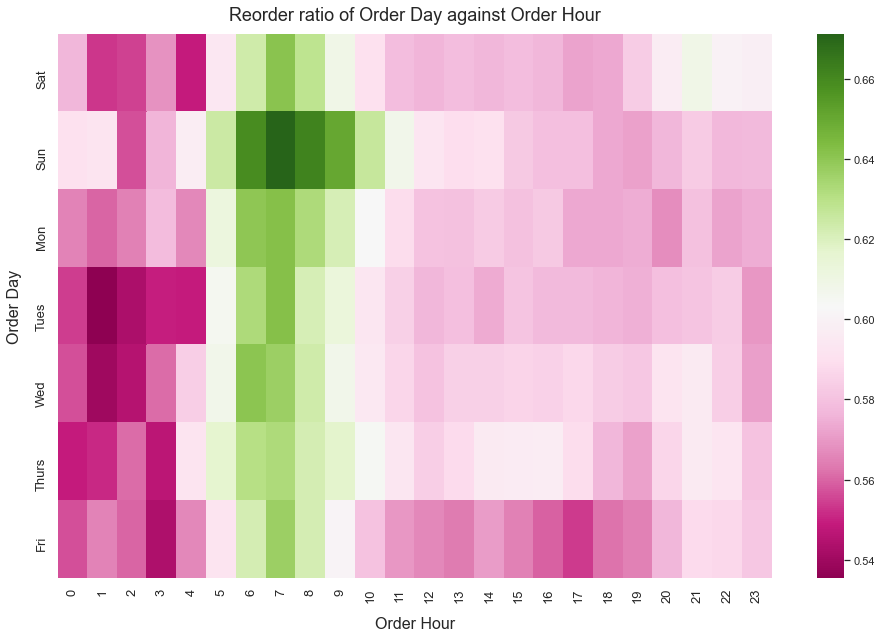

In [24]:
plt.figure(figsize=(16,10))

sns.heatmap(reordered_order_df, cmap="PiYG")

plt.title('Reorder ratio of Order Day against Order Hour', fontsize=18, pad=14)
plt.xlabel('Order Hour', fontsize=16, labelpad=14)
plt.ylabel('Order Day', fontsize=16, labelpad=14)
plt.yticks(fontsize=13)
plt.xticks(rotation='vertical', fontsize=13)
plt.show()

## 2. How does the cart position correlate with reorders? (Code 1.2)

### Code 1.2.1

In [25]:
df["add_to_cart_and_order_pos"] = df["add_to_cart_order"].copy()

### Code 1.2.2

/Users/jasonbeh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


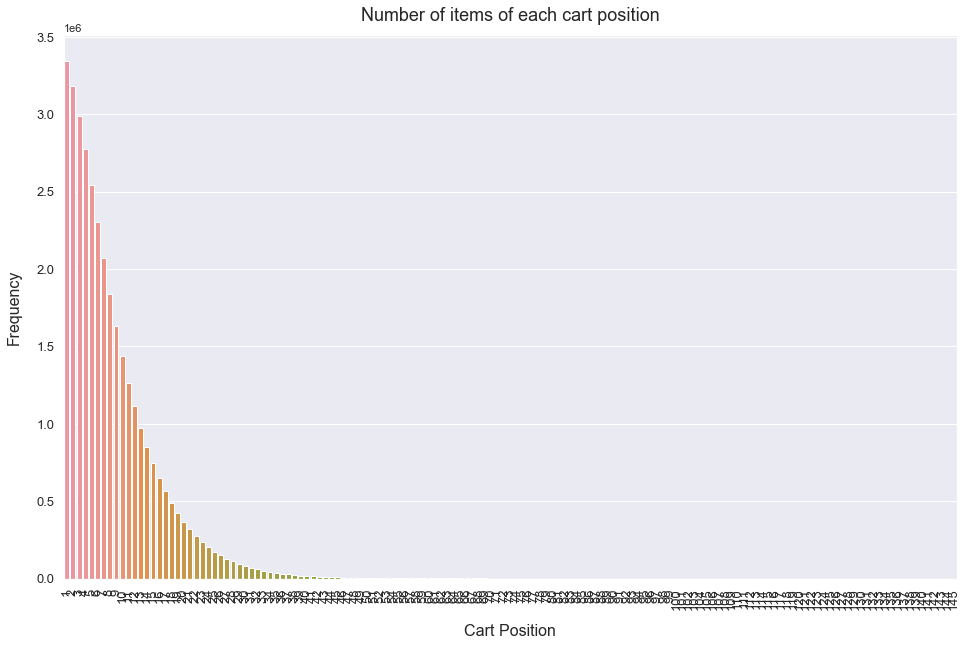

In [26]:
plt.figure(figsize=(16,10))
sns.countplot(df["add_to_cart_and_order_pos"])
plt.title('Number of items of each cart position', fontsize=18, pad=14)
plt.xlabel('Cart Position', fontsize=16, labelpad=14)
plt.ylabel('Frequency', fontsize=16, labelpad=14)
plt.yticks(fontsize=13)
plt.xticks(rotation='vertical', fontsize=13)

plt.show()

Here we see that the reorders above the 60th cart positions is very small, therefore we will filter until 60.

### Code 1.2.3

/Users/jasonbeh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


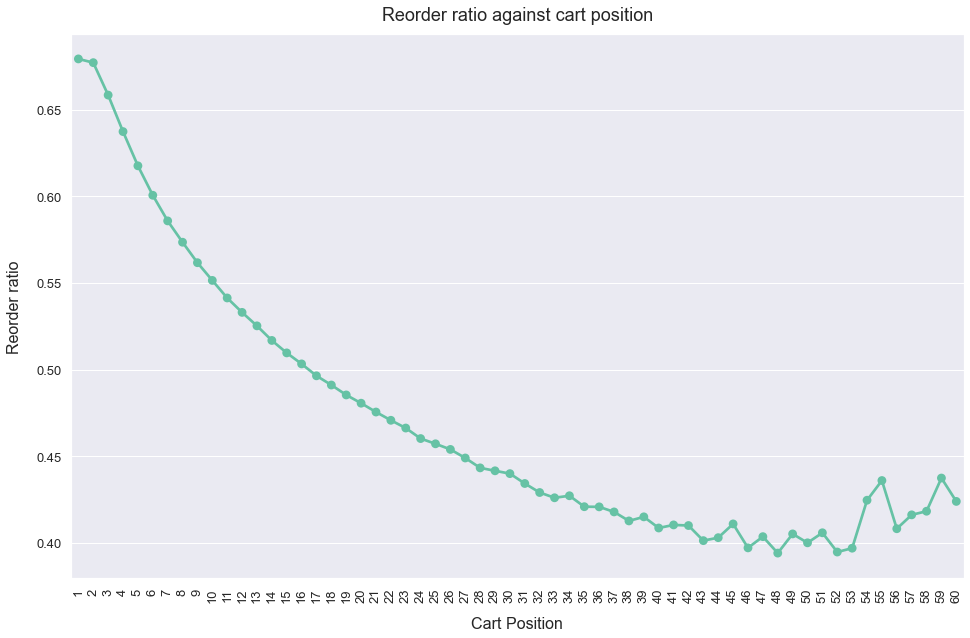

In [27]:
# Filter until 60th position
temp_df = df[df["add_to_cart_and_order_pos"] <= 60]

# Create a new dataframe with the mean of position and reorder ratio
cart_position_reorder_df = temp_df.groupby(["add_to_cart_and_order_pos"])["reordered"].aggregate("mean").reset_index()

# Plot graph
plt.figure(figsize=(16,10))
sns.pointplot(cart_position_reorder_df['add_to_cart_and_order_pos'].values, cart_position_reorder_df['reordered'].values)
plt.title("Reorder ratio against cart position", fontsize=18, pad=14)
plt.ylabel('Reorder ratio', fontsize=16, labelpad=14)
plt.xlabel('Cart Position', fontsize=16, labelpad=14)
plt.yticks(fontsize=13)
plt.xticks(rotation='vertical', fontsize=13)

plt.show()

### Code 1.2.4

In [28]:
st.pearsonr(cart_position_reorder_df['add_to_cart_and_order_pos'].to_numpy(), cart_position_reorder_df['reordered'].to_numpy())

(-0.8718121836256699, 1.255555720281148e-19)

## 3. How many days do people wait before reordering? (Code 1.3)

### Code 1.3.1

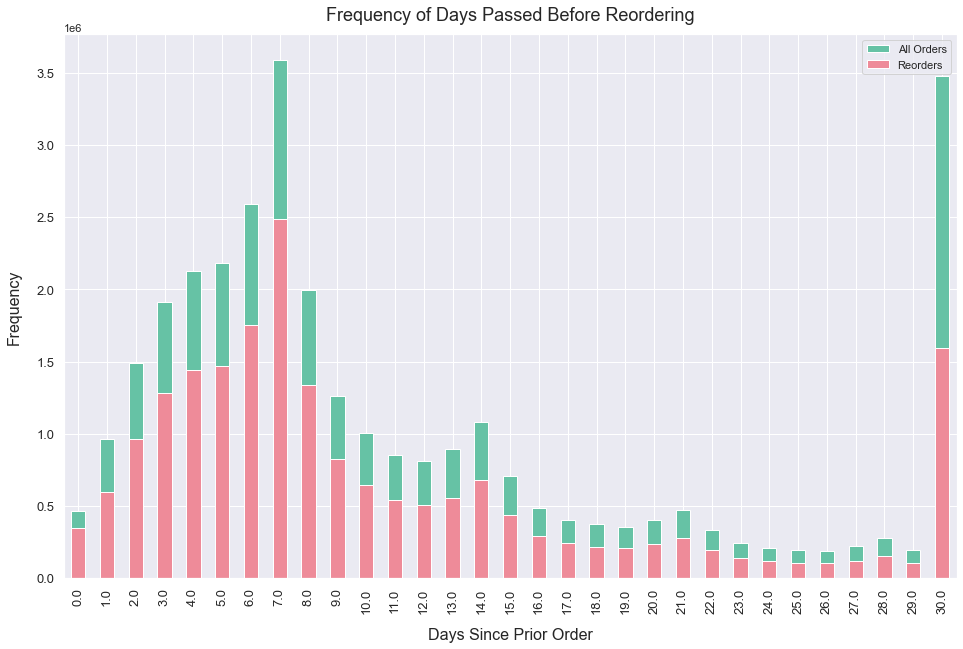

In [29]:
plt.figure(figsize=(16,10))
ax = df['days_since_prior_order'].value_counts().sort_index().plot.bar()
ax = df[df['reordered']==1].groupby(['days_since_prior_order']).size().sort_index().plot.bar(color = '#EE8B99')

plt.title('Frequency of Days Passed Before Reordering', fontsize=18, pad=14)
plt.xlabel("Days Since Prior Order", fontsize=16, labelpad=14)
plt.ylabel("Frequency", fontsize=16, labelpad=14)
plt.legend(["All Orders", "Reorders"])
plt.yticks(fontsize=13)
plt.xticks(rotation='vertical', fontsize=13)

plt.show()

## 4. Which products are frequently reordered?

In [30]:
reordered_products_df = df.groupby('product_name')['reordered'].count().sort_values(ascending = False)[:10].reset_index()

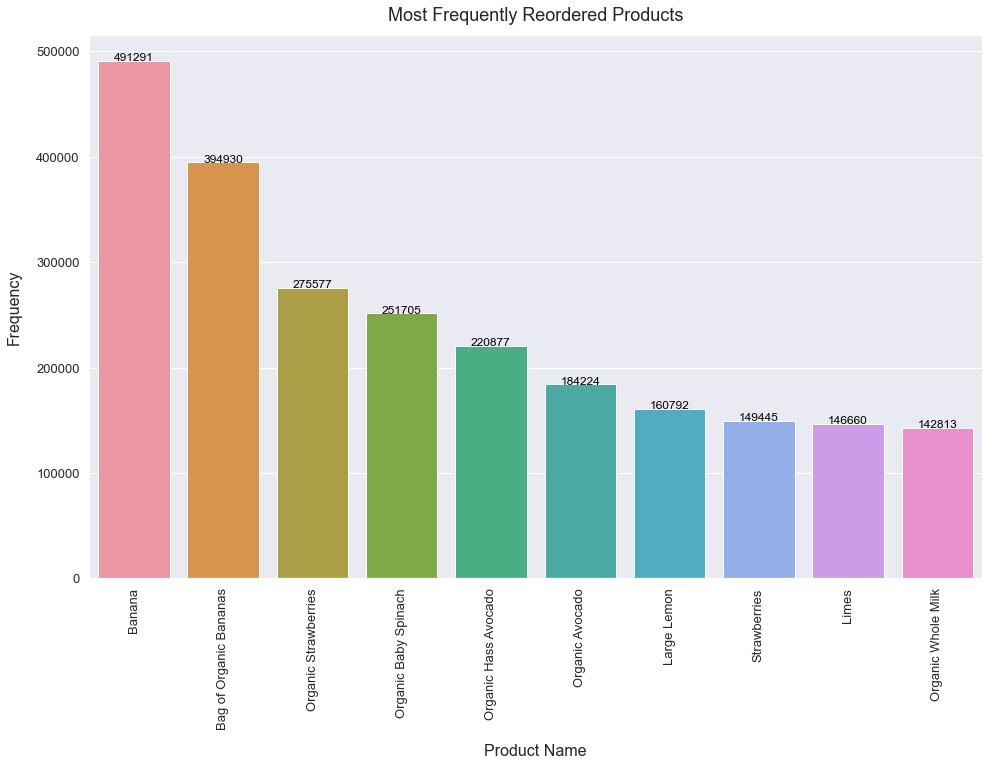

In [31]:
plt.figure(figsize=(16,10))

graph = sns.barplot(data=reordered_products_df, x="product_name", y="reordered")

plt.title('Most Frequently Reordered Products', fontsize=18, pad=14)
plt.xlabel('Product Name', fontsize=16, labelpad=14)
plt.ylabel('Frequency', fontsize=16, labelpad=14)
plt.yticks(fontsize=13)
plt.xticks(rotation='vertical', fontsize=13)

# Add text above each barplot
for index, row in reordered_products_df.iterrows():
    graph.text(row.name,row.reordered, round(row.reordered,2), color='black', ha="center")

## 5. Which aisles have the most orders?

In [32]:
aisle_orders_df = df.groupby('aisle')['order_id'].count().sort_values(ascending = False)[:15].reset_index()
aisle_orders_df.head()

,aisle,order_id
0,fresh fruits,3792661
1,fresh vegetables,3568630
2,packaged vegetables fruits,1843806
3,yogurt,1507583
4,packaged cheese,1021462


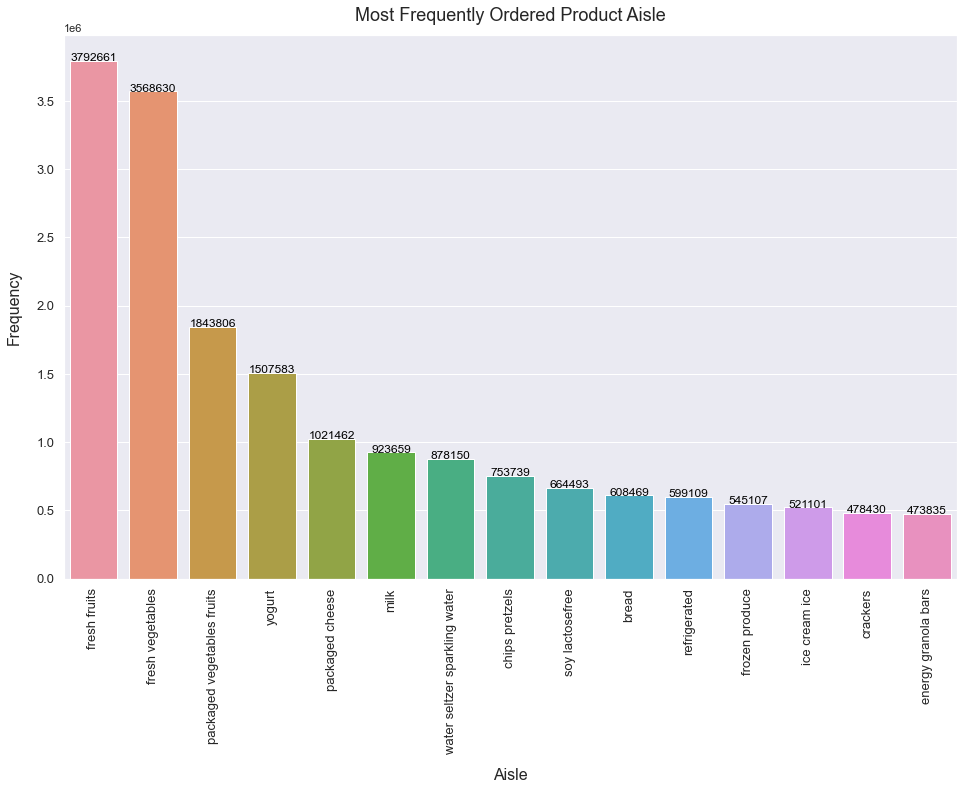

In [33]:
plt.figure(figsize=(16,10))

graph = sns.barplot(data=aisle_orders_df, x="aisle", y="order_id")

plt.title('Most Frequently Ordered Product Aisle', fontsize=18, pad=14)
plt.xlabel('Aisle', fontsize=16, labelpad=14)
plt.ylabel('Frequency', fontsize=16, labelpad=14)
plt.yticks(fontsize=13)
plt.xticks(rotation='vertical', fontsize=13)

# Add text above each barplot
for index, row in aisle_orders_df.iterrows():
    graph.text(row.name,row.order_id, round(row.order_id,2), color='black', ha="center")

## 6. What are the order frequency for each day?

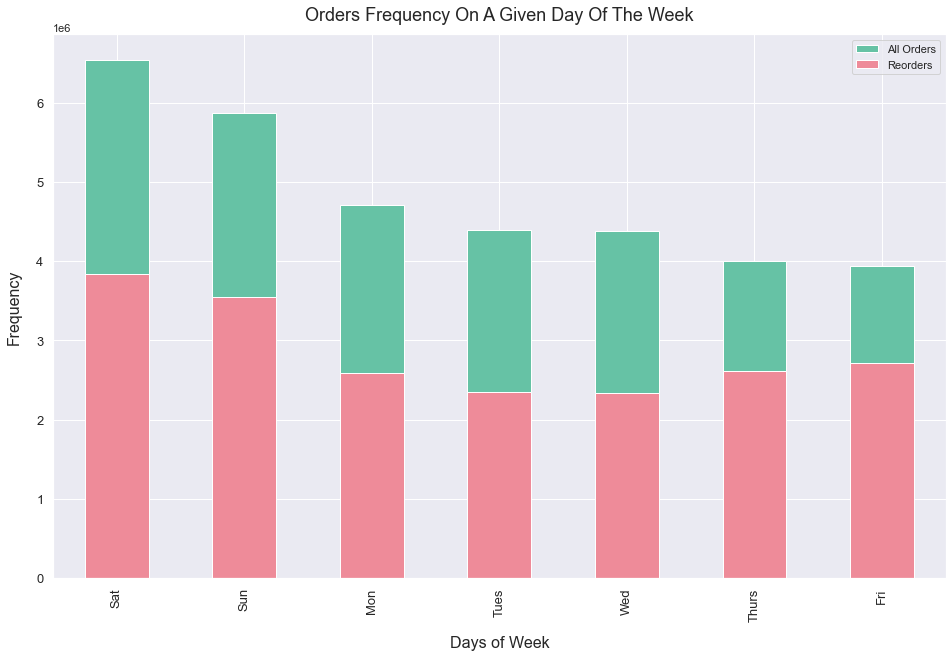

In [34]:
plt.figure(figsize=(16,10))

ax = df['order_dow'].value_counts().plot.bar()
ax = df[df['reordered']==1].groupby(['order_dow']).size().plot.bar(color = '#EE8B99')

plt.xlabel("Days of Week", fontsize=16, labelpad=14)
plt.ylabel("Frequency", fontsize=16, labelpad=14)
plt.title('Orders Frequency On A Given Day Of The Week', fontsize=18, pad=14)
plt.legend(["All Orders", "Reorders"])
plt.xticks([0,1,2,3,4,5,6], ['Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri'])
plt.yticks(fontsize=13)
plt.xticks(rotation='vertical', fontsize=13)

plt.show()

# Research Experiments

# 1. What day do people reorder their groceries, now that we have a 24/7 online grocery shopping app? (Code 2.1)

### Code 2.1.1

In [35]:
data_np = df[df['reordered']==1]['order_dow'].to_numpy()
data_np

array([4, 4, 4, ..., 2, 2, 2])

### Code 2.1.2

In [36]:
np.mean(data_np)

2.7251561485235043

Our population mean is 2.72515.

## Hypothesis

H0: Most reorders happen on Monday and Tuesday (µ = 2.7252).

H1: Most reorders do not happen on Monday and Tuesday (µ ≠ 2.7252).

### Code 2.1.3

In [37]:
np.random.seed(11234234)
sample = np.random.choice(data_np, 500, False)

### Code 2.1.4

In [38]:
stests.ztest(sample, value=np.mean(data_np), alternative="two-sided")

(-2.7039033713192917, 0.006853021449562536)

### Conclusion: We do not reject the null hypothesis as -1.343 > -1.96 at 5% significant level. There is insufficient evidence to suggest that most reorders do not happen on Monday and Tuesday.

# 2. Does the position of the cart affect reorders? (Code 2.2)

### Code 2.2.1

In [39]:
data_np = df[df['reordered']==1]['add_to_cart_order'].to_numpy()
data_np

array([1, 5, 2, ..., 6, 9, 4])

### Code 2.2.2

In [40]:
np.mean(data_np)

7.573082219513955

Our population mean is 7.5731.

## Hypothesis

H0: The mean cart position for reorders is 7.5731 (µ = 7.5731).

H1: The mean cart position for reorders is more than 7.5731 (µ ≠ 7.5731).

### Code 2.2.3

In [41]:
np.random.seed(11234234)
sample = np.random.choice(data_np, 500, False)

### Code 2.2.4

In [42]:
stests.ztest(sample, value=np.mean(data_np), alternative="larger")

(-1.249546235116558, 0.8942673230856557)

### Conclusion: We do not reject the null hypothesis as -0.8933 > - 1.96 at 5% significant level. There is insufficient evidence to suggest that the mean cart position for reorders is more than 7.5731.

# 3. How many days do people wait before reordering?

### Code 2.3.1

In [43]:
data_np = df[df['reordered']==1]['days_since_prior_order'].to_numpy()

### Code 2.3.2

In [44]:
np.mean(data_np)

10.438599303645738

## Hypothesis

H0: The mean days before most people reorders is 10.4386 (µ = 10.4386).

H1: The mean days before most people reorders is more than 10.4386 (µ > 10.4386).

### Code 2.3.3

In [45]:
np.random.seed(11234234)
sample = np.random.choice(data_np, 500, False)

### Code 2.3.4

In [46]:
stests.ztest(sample, value=np.mean(data_np), alternative="smaller")

(0.7449170890746551, 0.7718390782099286)

### Conclusion: We do not reject the null hypothesis as 0.7449 < 1.96 at 5% significant level. There is insufficient evidence to suggest that the mean days before most people reorders is more than 10.4386.